In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib.pylab import plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

# import colormaps as cmaps
# plt.register_cmap(name='viridis', cmap=cmaps.viridis)
# plt.set_cmap(cmaps.viridis)
plt.viridis()

<Figure size 1500x900 with 0 Axes>

In [2]:
df = pd.read_csv('D:\\Uyanga\\CS590\\Project\\Mar 24\\processed_dataset.csv', low_memory=False)
pd.options.display.max_columns = None
display(df)


,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists
0,0,0,10463.0,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1
1,1,1,10471.0,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1
2,2,1,10463.0,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1
3,3,1,10463.0,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1
4,4,1,10463.0,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375.0,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1
72254,75564,123,11375.0,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,24,1,2,2,2,

In [3]:
# Create ln price var
df['lnprice'] = np.log(df['price'])

In [4]:
# Drop nan zips
dfzip = df[df['address/zipcode'].notna()]
dfzip['address/zipcode'] = dfzip['address/zipcode'].astype(int)
#dfzip = df[df['address/zipcode']!=-1]
display(dfzip)

C:\Users\batzo\AppData\Local\Temp\ipykernel_23464\3302222962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfzip['address/zipcode'] = dfzip['address/zipcode'].astype(int)


,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists,lnprice
0,0,0,10463,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1,13.592366
1,1,1,10471,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1,15.200554
2,2,1,10463,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1,14.217637
3,3,1,10463,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1,15.053885
4,4,1,10463,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1,14.397726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1,13.623139
72254,75564,123,11375,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.6

In [5]:
# Median house prices
p50_by_zip = dfzip.groupby('address/zipcode')['price'].median()
print(p50_by_zip)
p50 = p50_by_zip.reset_index()
p50.columns = ['address/zipcode', 'p50_by_zip']
print(p50)

address/zipcode
148      2450000.0
10001    2512500.0
10002     962500.0
10003    2297500.0
10004    1340000.0
           ...    
11697     475000.0
11755     295000.0
12694     350000.0
12764     145000.0
13277     399000.0
Name: price, Length: 196, dtype: float64
     address/zipcode  p50_by_zip
0                148   2450000.0
1              10001   2512500.0
2              10002    962500.0
3              10003   2297500.0
4              10004   1340000.0
..               ...         ...
191            11697    475000.0
192            11755    295000.0
193            12694    350000.0
194            12764    145000.0
195            13277    399000.0

[196 rows x 2 columns]


In [6]:
# Load NYC zipcode shapefile
zipcode_shp = gpd.read_file("D:\\Uyanga\\CS590\\Project\\From Avinno\\ZIP_CODE_040114\\ZIP_CODE_040114.shp")
display(zipcode_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [7]:
# Median ln house prices
lnp50_by_zip = dfzip.groupby('address/zipcode')['lnprice'].median()

print(lnp50_by_zip)
lnp50 = lnp50_by_zip.reset_index()
lnp50.columns = ['address/zipcode', 'lnp50_by_zip']
print(lnp50)

days_by_zip = dfzip.groupby('address/zipcode')['days_on_Zillow'].median()
mdays_by_zip = days_by_zip.reset_index()
mdays_by_zip.columns = ['address/zipcode', 'days_by_zip']
print(mdays_by_zip)

sales_by_zip = dfzip.groupby('address/zipcode')['number_of_Sold'].agg(['mean']).round()
sales = sales_by_zip.reset_index()
sales.columns = ['address/zipcode', 'sales_by_zip']
print(sales)


address/zipcode
148      14.711599
10001    14.736479
10002    13.776719
10003    14.647332
10004    14.080678
           ...    
11697    13.071070
11755    12.594731
12694    12.765688
12764    11.884489
13277    12.896717
Name: lnprice, Length: 196, dtype: float64
     address/zipcode  lnp50_by_zip
0                148     14.711599
1              10001     14.736479
2              10002     13.776719
3              10003     14.647332
4              10004     14.080678
..               ...           ...
191            11697     13.071070
192            11755     12.594731
193            12694     12.765688
194            12764     11.884489
195            13277     12.896717

[196 rows x 2 columns]
     address/zipcode  days_by_zip
0                148          NaN
1              10001        133.0
2              10002         79.0
3              10003        133.5
4              10004         58.0
..               ...          ...
191            11697          7.0
192            1

## Maps

In [8]:
# Load boroughs shapefile
boroughs_shp = gpd.read_file("D:\\Uyanga\\CS590\\Project\\From Avinno\\Borough Boundaries\\geo_export_d6545f9d-905c-4b1e-a07d-16838d33c369.shp")
display(boroughs_shp)

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1.0,Manhattan,6.365208e+08,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934143e+09,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [9]:
dfzip

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists,lnprice
0,0,0,10463,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1,13.592366
1,1,1,10471,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1,15.200554
2,2,1,10463,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1,14.217637
3,3,1,10463,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1,15.053885
4,4,1,10463,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1,14.397726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1,13.623139
72254,75564,123,11375,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.6

In [10]:
# Spatial Join
zipcode_shp = zipcode_shp.to_crs(epsg=2263)
boroughs_shp = boroughs_shp.to_crs(epsg=2263)

bzip_shp = zipcode_shp.sjoin(boroughs_shp, how="inner", predicate='intersects')
bzip_shp['ZIPCODE']=pd.to_numeric(bzip_shp['ZIPCODE'])
display(bzip_shp)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579
52,11357,0,Whitestone,38944.0,7.735911e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1032754.160 229746.959, 1032795.350 ...",4,4.0,Queens,3.041419e+09,888199.731579
55,11356,0,College Point,23379.0,4.332116e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1024499.860 226921.788, 1024502.126 ...",4,4.0,Queens,3.041419e+09,888199.731579
56,11359,0,Bayside,0.0,6.567982e+06,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1044673.160 228935.889, 1044671.935 ...",4,4.0,Queens,3.041419e+09,888199.731579
57,11360,0,Bayside,18973.0,3.883482e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1043330.530 227284.239, 1043339.600 ...",4,4.0,Queens,3.041419e+09,888199.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,10308,0,Staten Island,27612.0,6.275104e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((938154.387 143446.350, 938403.951 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
155,10312,0,Staten Island,58506.0,1.690874e+08,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((928850.453 143511.403, 928874.915 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
156,10309,0,Staten Island,33114.0,2.158358e+08,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((925030.252 142864.440, 925041.345 14...",0,5.0,Staten Island,1.623621e+09,325917.353702
157,10307,0,Staten Island,14096.0,4.602838e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((914830.906 127205.951, 914831.917 12...",0,5.0,Staten Island,1.623621e+09,325917.353702


In [11]:
# Merge data
zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
merged_shp = pd.merge(zipcode_shp, p50, left_on='ZIPCODE', right_on='address/zipcode')
merged_shp = pd.merge(merged_shp, lnp50, left_on='ZIPCODE', right_on='address/zipcode')
merged_shp = pd.merge(merged_shp, mdays_by_zip, left_on='ZIPCODE', right_on='address/zipcode')
merged_shp = pd.merge(merged_shp, sales, left_on='ZIPCODE', right_on='address/zipcode')

C:\Users\batzo\AppData\Local\Temp\ipykernel_23464\446398177.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'address/zipcode_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_shp = pd.merge(merged_shp, sales, left_on='ZIPCODE', right_on='address/zipcode')


In [12]:
# Merge data
zipcode_shp['ZIPCODE']=pd.to_numeric(zipcode_shp['ZIPCODE'])
a = pd.merge(zipcode_shp, dfzip, left_on='ZIPCODE', right_on='address/zipcode')
dfzip

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,yearBuilt,zpid,school/midd/num,school/high/num,school/elem/avgDist,school/midd/avgDist,school/high/avgDist,school/elem/avgSpt,school/midd/avgSpt,school/high/avgSpt,Average Education Index,Private High School Enrollment Percentage,High School Graduate Education Percentage,Native Born Population Percentage,Foreign Born Population Percentage,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Real estate taxes amount,Mortgage interest paid amount,Taxable income amount,number_of_photos,number_of_Listed for rent,number_of_Listed for sale,number_of_Listing removed,number_of_Pending sale,number_of_Price change,number_of_Sold,description_exists,description_lengths,priceChangeRate,days_on_Zillow,url_exists,lnprice
0,0,0,10463,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,1920.0,3.155405e+07,1,0,0.050000,0.050000,0.000000,7.000000,7.0,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,27,0,3,2,0,2,0,0,0,0.335558,12.0,1,13.592366
1,1,1,10471,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,1940.0,2.985412e+07,1,0,0.200000,0.150000,0.000000,8.000000,7.5,0.0,15.04,0.449,0.180,0.773,0.227,0.700,0.079,0.089,0.229,14788.0,17175.0,1112878.0,47,0,3,2,1,2,1,1,264,-0.111235,176.0,1,15.200554
2,2,1,10463,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,1920.0,2.985186e+07,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,24,0,1,0,0,1,0,0,0,-0.002668,214.0,1,14.217637
3,3,1,10463,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,1950.0,2.985186e+07,1,0,0.100000,0.150000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,15,0,2,1,1,1,2,1,215,-0.092105,120.0,1,15.053885
4,4,1,10463,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,2020.0,2.077107e+09,1,0,0.150000,0.200000,0.000000,8.000000,7.5,0.0,13.77,0.173,0.201,0.695,0.305,0.448,0.157,0.036,0.489,13587.0,22632.0,1839481.0,22,0,1,0,0,0,0,1,187,0.000000,62.0,1,14.397726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,1920.0,3.200295e+07,1,1,0.066667,0.200000,0.133333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.642,0.029,0.260,0.129,34432.0,51950.0,2989250.0,1,0,1,1,0,0,1,0,0,-0.078498,NaN,1,13.623139
72254,75564,123,11375,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,1925.0,3.200501e+07,1,1,0.033333,0.233333,0.333333,5.333333,5.0,5.0,15.19,0.329,0.167,0.542,0.458,0.6

In [13]:
dfzip.shape

(72240, 66)

In [14]:
a_boro=dfzip.merge(bzip_shp, left_on='address/zipcode', right_on='ZIPCODE')
a_boro.columns

Index(['Unnamed: 0', 'address/city', 'address/zipcode', 'bathrooms',
       'bedrooms', 'homeStatus', 'latitude', 'livingArea', 'longitude',
       'price', 'propertyTaxRate', 'resoFactsStats/bathrooms',
       'resoFactsStats/bathroomsFull', 'resoFactsStats/bathroomsHalf',
       'resoFactsStats/bedrooms', 'resoFactsStats/cityRegion',
       'resoFactsStats/garageSpaces', 'resoFactsStats/hasAttachedGarage',
       'resoFactsStats/hasAttachedProperty', 'resoFactsStats/hasCooling',
       'resoFactsStats/hasGarage', 'resoFactsStats/hasHeating',
       'resoFactsStats/hasOpenParking', 'resoFactsStats/hasView',
       'resoFactsStats/homeType', 'resoFactsStats/livingArea',
       'resoFactsStats/lotSize', 'resoFactsStats/parking',
       'resoFactsStats/taxAnnualAmount', 'resoFactsStats/taxAssessedValue',
       'resoFactsStats/yearBuilt', 'yearBuilt', 'zpid', 'school/midd/num',
       'school/high/num', 'school/elem/avgDist', 'school/midd/avgDist',
       'school/high/avgDist', 'school/e

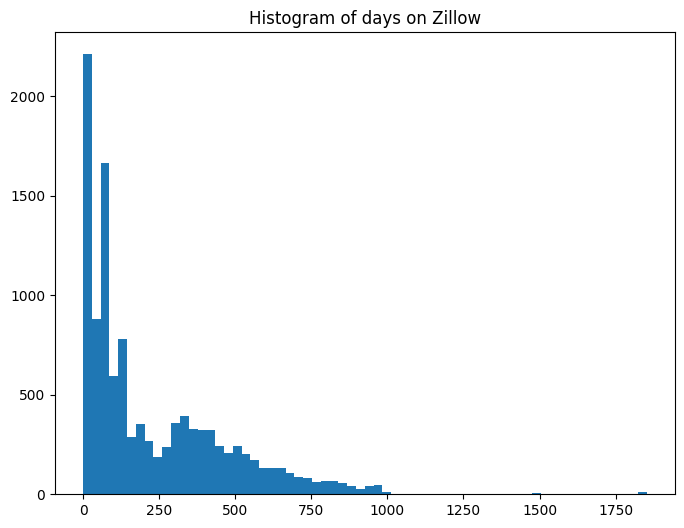

In [15]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

In [42]:
a_boro.shape

(82938, 84)

In [47]:
print('Median number of days on Zilow =', a_boro["days_on_Zillow"].median())

Median number of days on Zilow = 130.0


In [111]:
print('Median number of days on Zilow =', a_boro["days_on_Zillow"].mean())

Median number of days on Zilow = 229.7816425120773


In [114]:
a_boro["days_on_Zillow"].min()

0.0

In [106]:
print('Median number of days on Zilow|Manhattan =', a_boro.loc[a_boro['boro_name'] == 'Manhattan']["days_on_Zillow"].median())

Median number of days on Zilow|Manhattan = 128.0


In [107]:
print('Median number of days on Zilow|Bronx =', a_boro.loc[a_boro['boro_name'] == 'Bronx']["days_on_Zillow"].median())

Median number of days on Zilow|Bronx = 256.0


In [108]:
print('Median number of days on Zilow|Brooklyn =', a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["days_on_Zillow"].median())

Median number of days on Zilow|Brooklyn = 281.0


In [109]:
print('Median number of days on Zilow|Staten Island =', a_boro.loc[a_boro['boro_name'] == 'Staten Island']["days_on_Zillow"].median())

Median number of days on Zilow|Staten Island = 84.0


In [110]:
print('Median number of days on Zilow|Queens =', a_boro.loc[a_boro['boro_name'] == 'Queens']["days_on_Zillow"].median())

Median number of days on Zilow|Queens = 59.0


<AxesSubplot: xlabel='boro_name', ylabel='days_on_Zillow'>

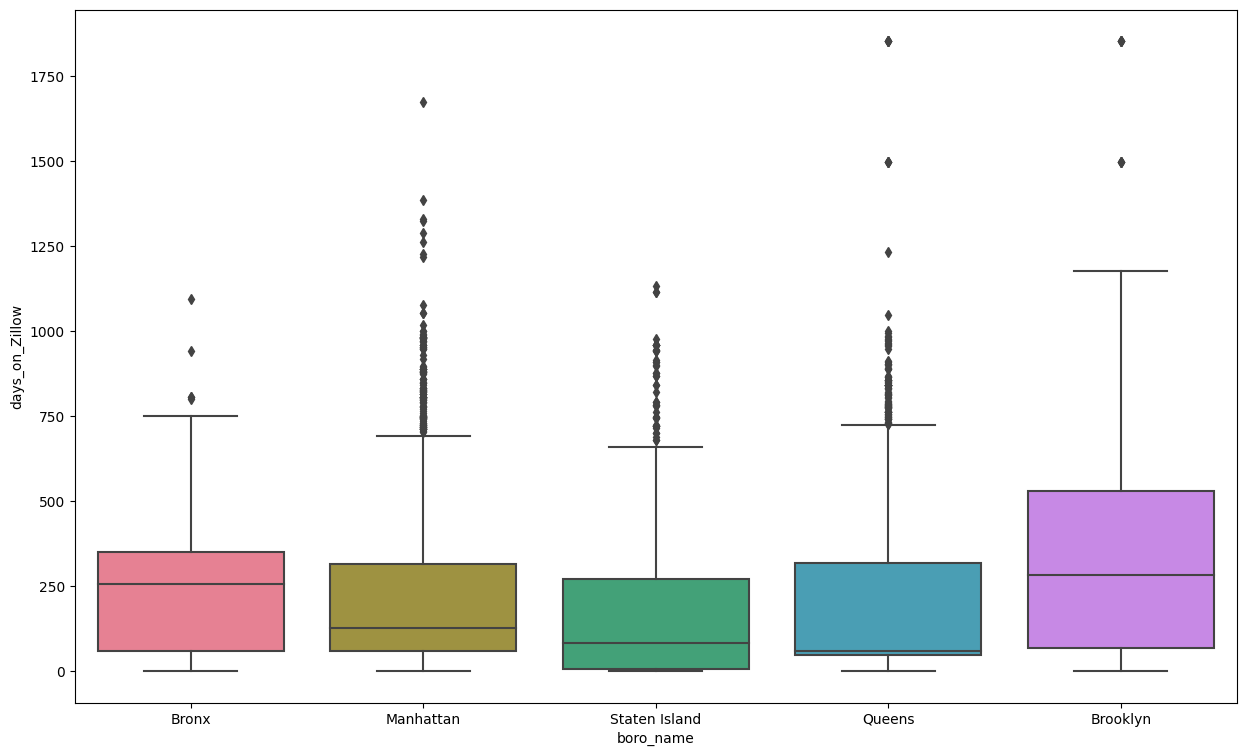

In [55]:
sns.boxplot(x = a_boro['boro_name'],
            y = a_boro['days_on_Zillow'],
            palette = 'husl')

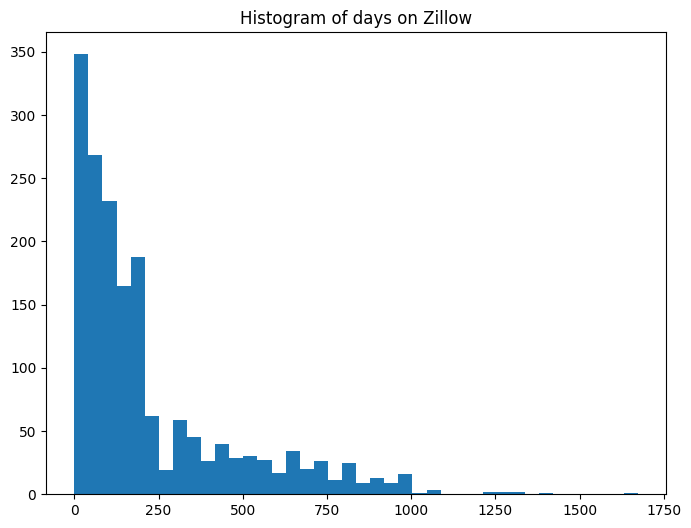

In [17]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro.loc[a_boro['boro_name'] == 'Manhattan']["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

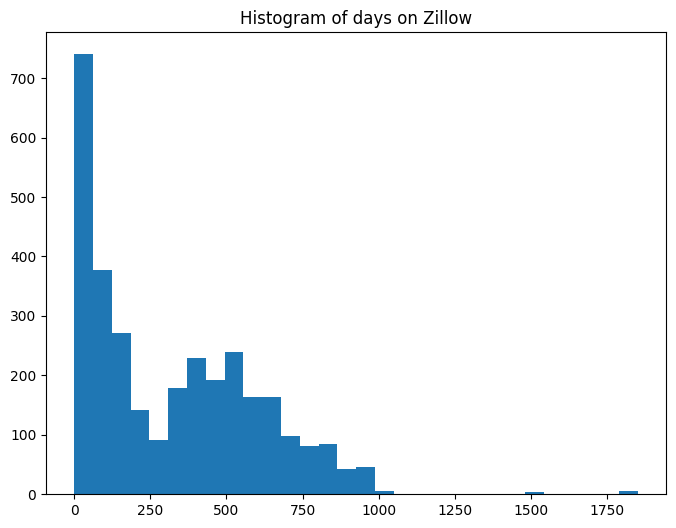

In [18]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

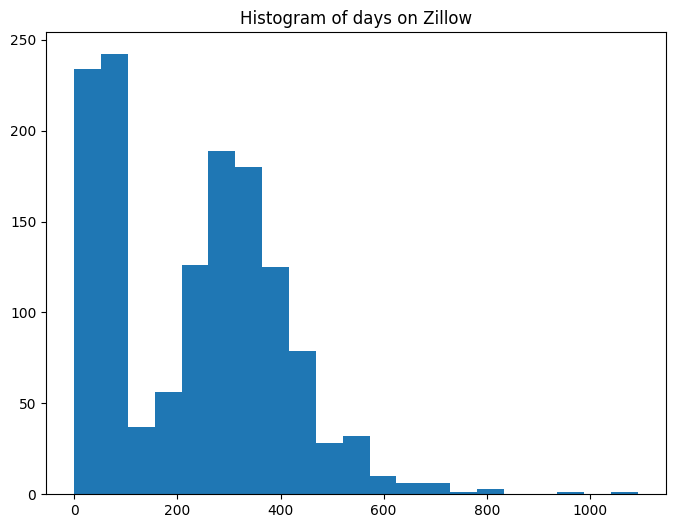

In [19]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro.loc[a_boro['boro_name'] == 'Bronx']["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

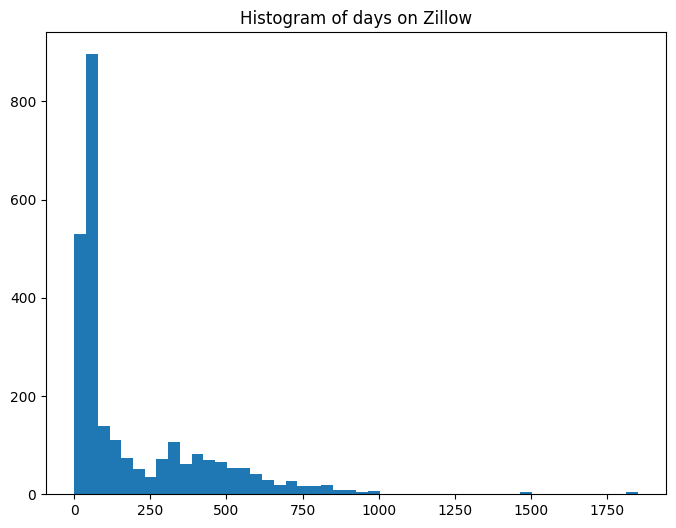

In [20]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro.loc[a_boro['boro_name'] == 'Queens']["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

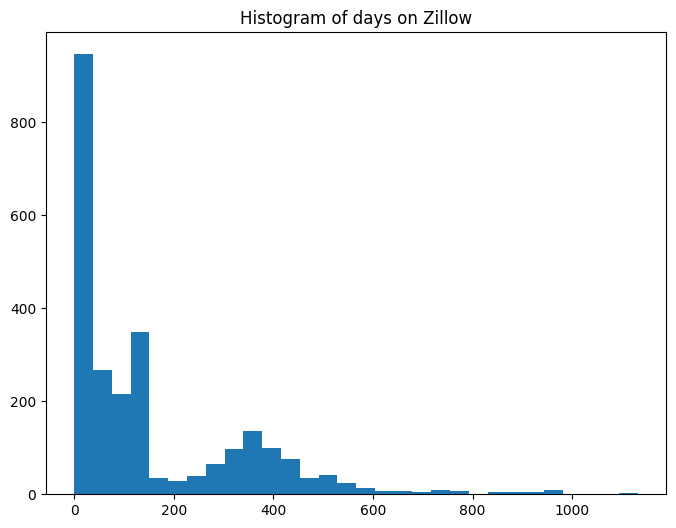

In [21]:
# Histogram of lnPrice
fig, ax = plt.subplots(figsize=(8, 6))
a_boro.loc[a_boro['boro_name'] == 'Staten Island']["days_on_Zillow"].hist(bins='auto')
ax.set_title('Histogram of days on Zillow')
ax.grid(False)

plt.show()

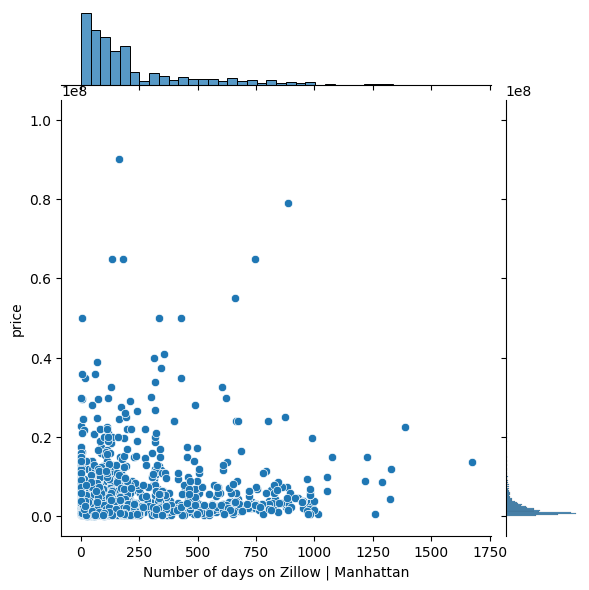

In [72]:
h=sns.jointplot(x=a_boro.loc[a_boro['boro_name'] == 'Manhattan']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Manhattan']["price"], kind='scatter') 
h.ax_joint.set_xlabel('Number of days on Zillow | Manhattan')
plt.show()

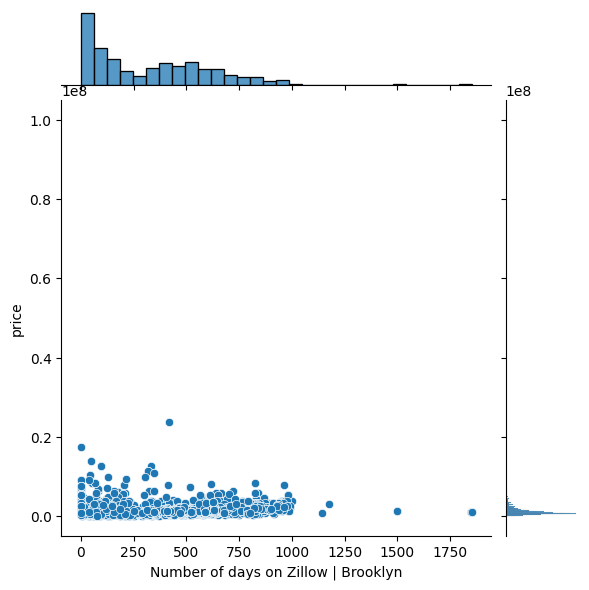

In [74]:
h=sns.jointplot(x=a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["price"], kind='scatter')
h.ax_joint.set_xlabel('Number of days on Zillow | Brooklyn')
plt.show()

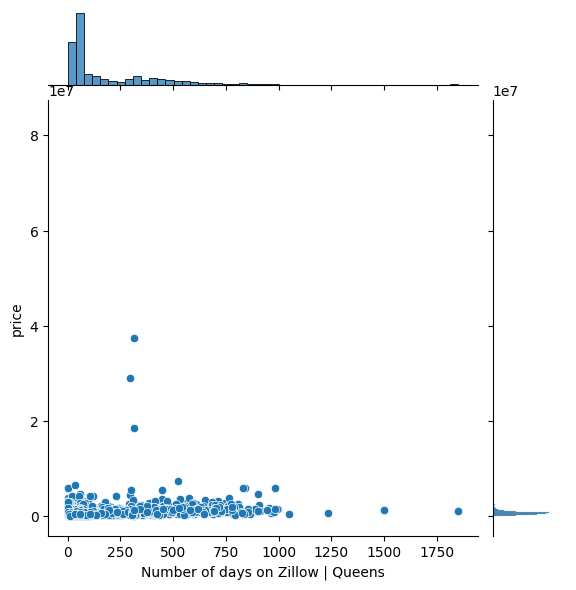

In [77]:
h=sns.jointplot(x=a_boro.loc[a_boro['boro_name'] == 'Queens']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Queens']["price"], kind='scatter')
h.ax_joint.set_xlabel('Number of days on Zillow | Queens')
plt.show()

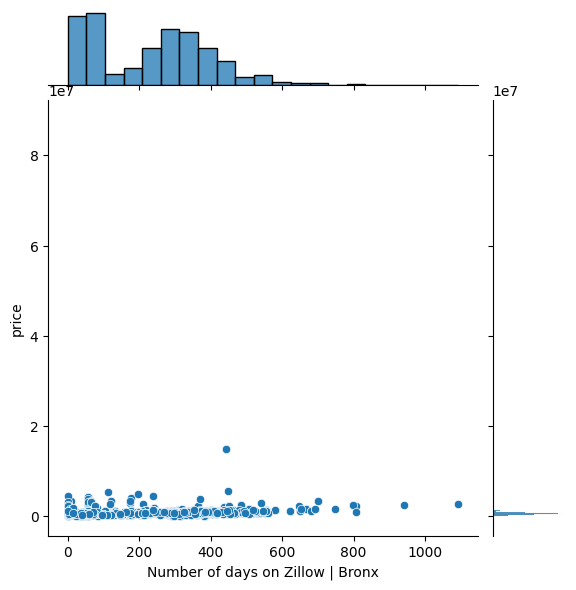

In [78]:
h=sns.jointplot(x=a_boro.loc[a_boro['boro_name'] == 'Bronx']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Bronx']["price"], kind='scatter')
h.ax_joint.set_xlabel('Number of days on Zillow | Bronx')
plt.show()

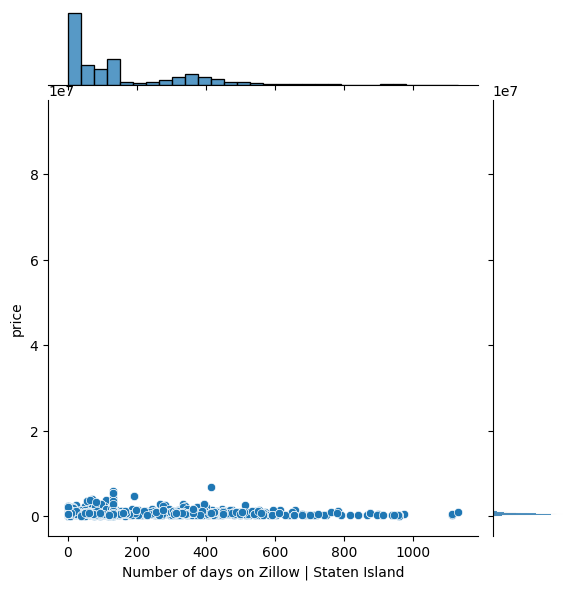

In [79]:
h=sns.jointplot(x=a_boro.loc[a_boro['boro_name'] == 'Staten Island']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Staten Island']["price"], kind='scatter')
h.ax_joint.set_xlabel('Number of days on Zillow | Staten Island')
plt.show()

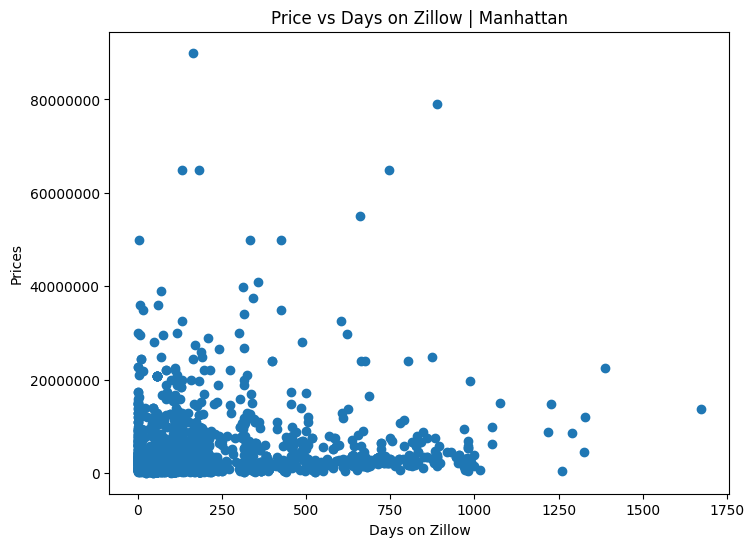

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=a_boro.loc[a_boro['boro_name'] == 'Manhattan']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Manhattan']["price"], 
           )

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Price vs Days on Zillow | Manhattan')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles

plt.show()

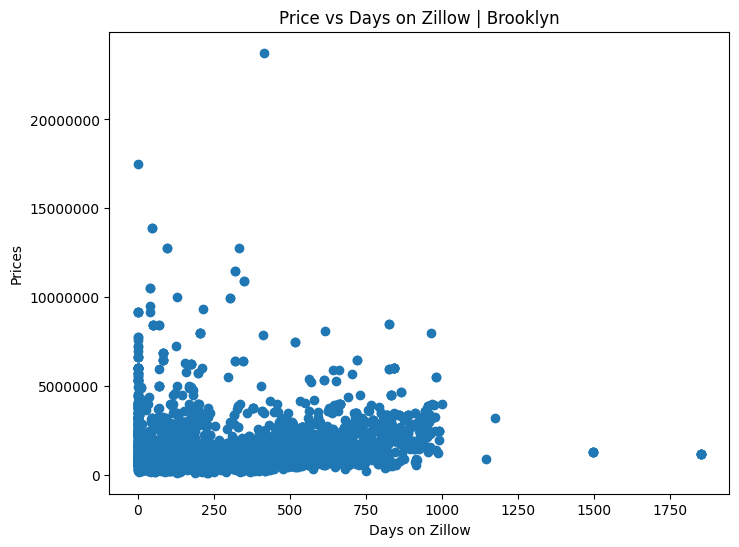

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Brooklyn']["price"], 
           )

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Price vs Days on Zillow | Brooklyn')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles

plt.show()

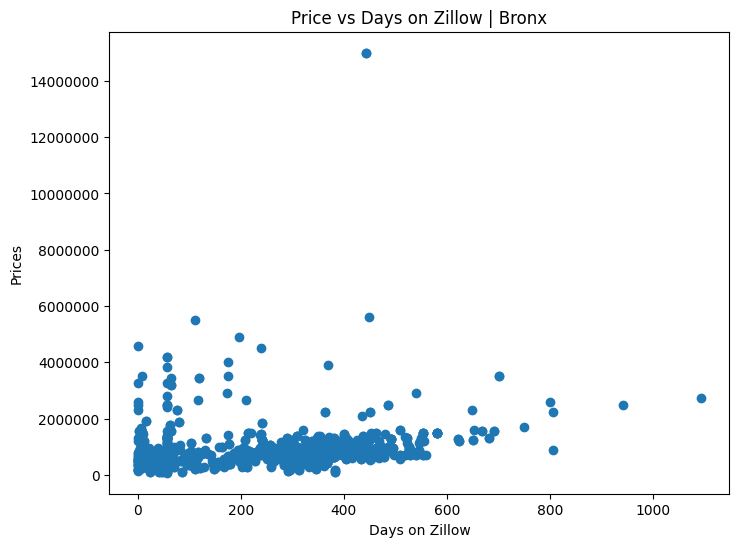

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=a_boro.loc[a_boro['boro_name'] == 'Bronx']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Bronx']["price"], 
           )

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Price vs Days on Zillow | Bronx')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles

plt.show()

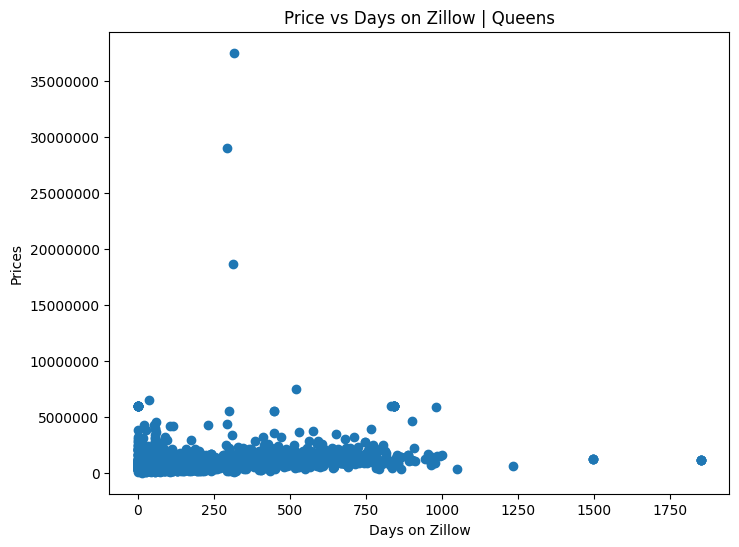

In [93]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=a_boro.loc[a_boro['boro_name'] == 'Queens']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Queens']["price"], 
           )

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Price vs Days on Zillow | Queens')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles

plt.show()

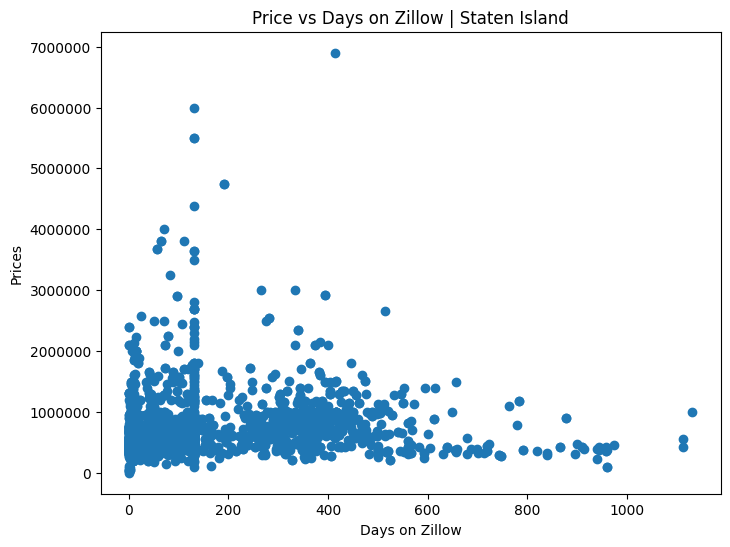

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=a_boro.loc[a_boro['boro_name'] == 'Staten Island']["days_on_Zillow"], y=a_boro.loc[a_boro['boro_name'] == 'Staten Island']["price"], 
           )

# Set axis labels and title
ax.set_xlabel('Days on Zillow')
ax.set_ylabel('Prices')
ax.set_title('Price vs Days on Zillow | Staten Island')

plt.ticklabel_format(style='plain')    # to prevent scientific notation.

# add a legend for the bubbles

plt.show()

In [27]:
merged_shp

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address/zipcode_x,p50_by_zip,address/zipcode_y,lnp50_by_zip,address/zipcode_x,days_by_zip,address/zipcode_y,sales_by_zip
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,525000.0,11436,13.171154,11436,NaN,11436,2.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,1210000.0,11213,14.006131,11213,556.0,11213,2.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,538435.0,11212,13.196418,11212,294.5,11212,2.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,1300000.0,11225,14.077875,11225,291.0,11225,2.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,1300000.0,11218,14.077875,11218,230.0,11218,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,11361,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1048944.167 222063.575, 1048950.337 ...",11361,890000.0,11361,13.698977,11361,58.0,11361,2.0
190,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",10036,807000.0,10036,13.601030,10036,84.0,10036,1.0
191,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",11414,635000.0,11414,13.361380,11414,58.0,11414,1.0
192,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",10310,520000.0,10310,13.161584,10310,103.0,10310,2.0


In [28]:
merged_boro=merged_shp.merge(bzip_shp, left_on='ZIPCODE', right_on='ZIPCODE')

In [29]:
merged_boro.head()

,ZIPCODE,BLDGZIP_x,PO_NAME_x,POPULATION_x,AREA_x,STATE_x,COUNTY_x,ST_FIPS_x,CTY_FIPS_x,URL_x,SHAPE_AREA_x,SHAPE_LEN_x,geometry_x,address/zipcode_x,p50_by_zip,address/zipcode_y,lnp50_by_zip,address/zipcode_x,days_by_zip,address/zipcode_y,sales_by_zip,BLDGZIP_y,PO_NAME_y,POPULATION_y,AREA_y,STATE_y,COUNTY_y,ST_FIPS_y,CTY_FIPS_y,URL_y,SHAPE_AREA_y,SHAPE_LEN_y,geometry_y,index_right,boro_code,boro_name,shape_area,shape_leng
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,525000.0,11436,13.171154,11436,NaN,11436,2.0,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",4,4.0,Queens,3.041419e+09,888199.731579
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,1210000.0,11213,14.006131,11213,556.0,11213,2.0,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",3,3.0,Brooklyn,1.934143e+09,728197.541089
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,538435.0,11212,13.196418,11212,294.5,11212,2.0,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",3,3.0,Brooklyn,1.934143e+09,728197.541089
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,1300000.0,11225,14.077875,11225,291.0,11225,2.0,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",3,3.0,Brooklyn,1.934143e+09,728197.541089
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,1300000.0,11218,14.077875,11218,230.0,11218,2.0,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",3,3.0,Brooklyn,1.934143e+09,728197.541089


In [30]:
boroughs_shp['boro_name']

0    Staten Island
1            Bronx
2        Manhattan
3         Brooklyn
4           Queens
Name: boro_name, dtype: object

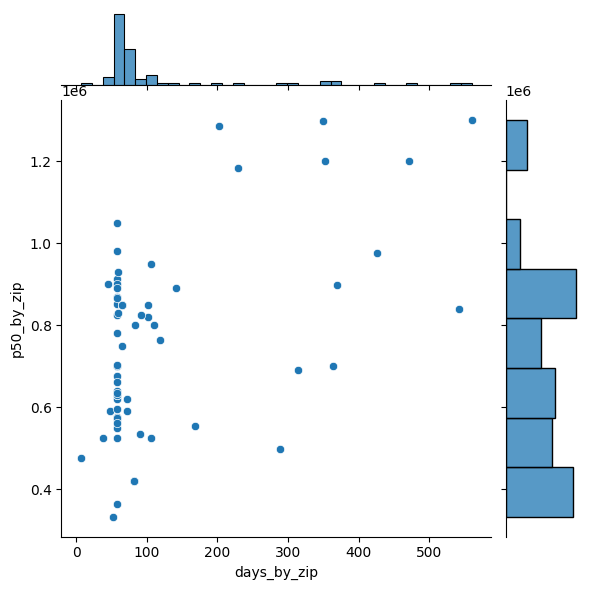

In [31]:
sns.jointplot(x=merged_boro.loc[merged_boro['boro_name'] == 'Queens']["days_by_zip"], y=merged_boro.loc[merged_boro['boro_name'] == 'Queens']["p50_by_zip"], kind='scatter')
plt.show()

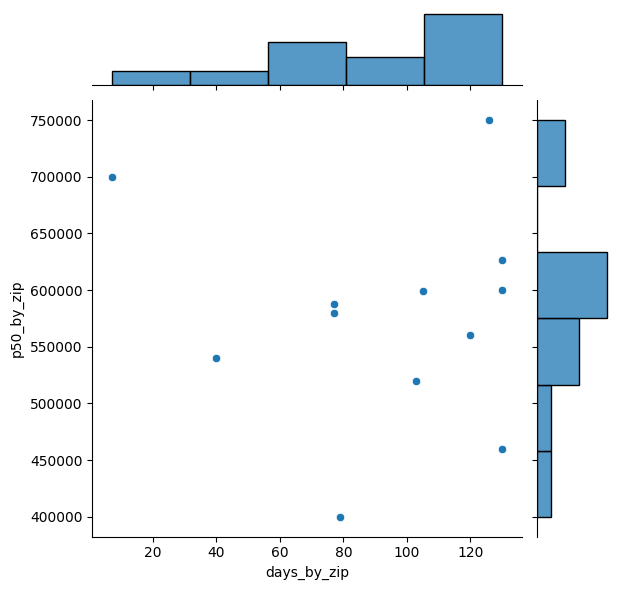

In [32]:
sns.jointplot(x=merged_boro.loc[merged_boro['boro_name'] == 'Staten Island']["days_by_zip"], y=merged_boro.loc[merged_boro['boro_name'] == 'Staten Island']["p50_by_zip"], kind='scatter')
plt.show()

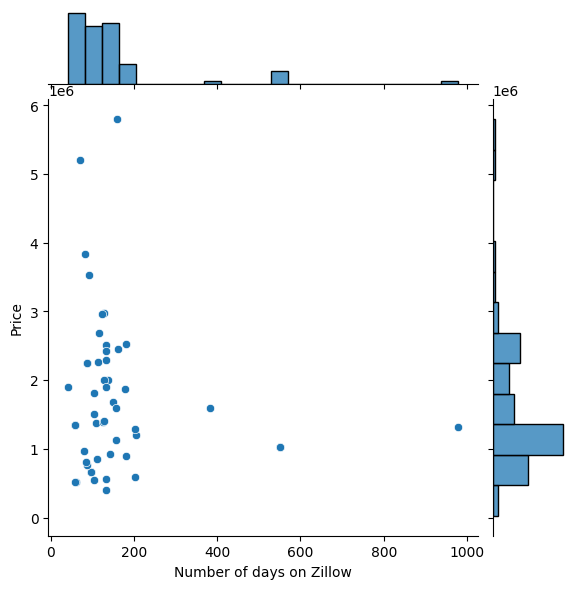

In [58]:
h=sns.jointplot(x=merged_boro.loc[merged_boro['boro_name'] == 'Manhattan']["days_by_zip"], y=merged_boro.loc[merged_boro['boro_name'] == 'Manhattan']["p50_by_zip"], kind='scatter')
h.ax_joint.set_xlabel('Number of days on Zillow')
h.ax_joint.set_ylabel('Price')
plt.show()

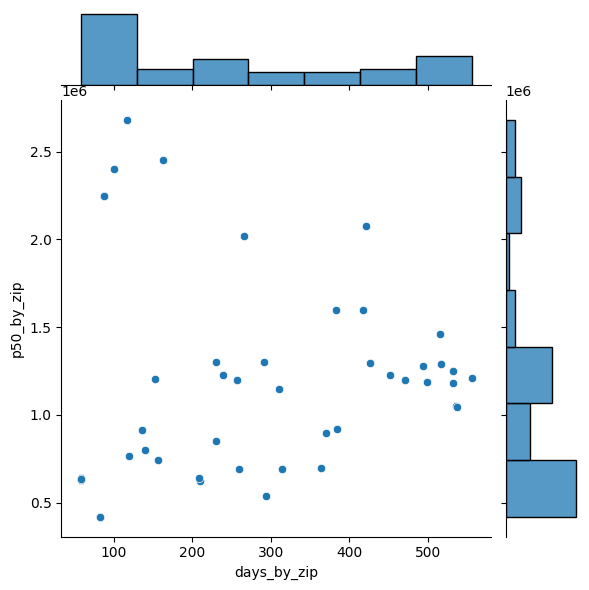

In [34]:
sns.jointplot(x=merged_boro.loc[merged_boro['boro_name'] == 'Brooklyn']["days_by_zip"], y=merged_boro.loc[merged_boro['boro_name'] == 'Brooklyn']["p50_by_zip"], kind='scatter')
plt.show()

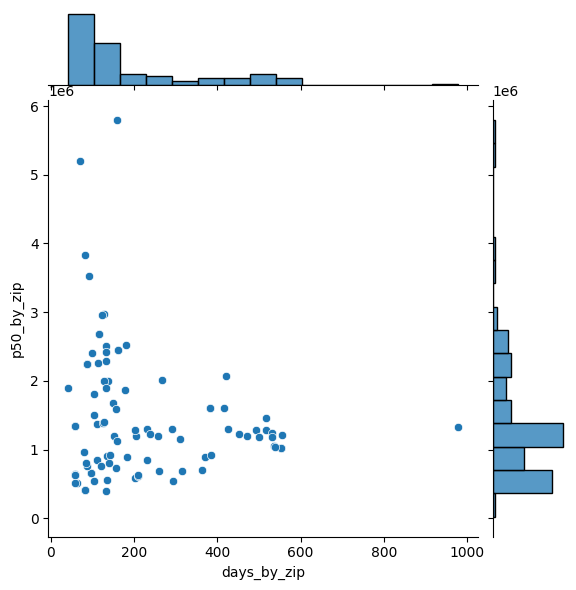

In [35]:
sns.jointplot(x=merged_boro.loc[merged_boro['boro_name'].isin(['Brooklyn', 'Manhattan'])]["days_by_zip"], y=merged_boro.loc[merged_boro['boro_name'].isin(['Brooklyn', 'Manhattan'])]["p50_by_zip"], kind='scatter')
plt.show()